### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [5]:
df = pd.read_csv('possum.csv')

In [6]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Данные содержат следующие столбцы:

case - случаи

site - место

Pop	- популяция

sex	- пол

age	- возраст

hdlngth	- длинна головы

skullw - ширина черепа

totlngth - общая длинна	

taill - хвост

footlgth - длинна ноги

earconch - размер уха

eye - глаз

chest - грудь

belly - живот

Мы будем использовать для обучения такие модели:
- LinearRegression(Линейная регрессия)
- KNeighborsRegressor(Регрессия ближайших соседей)
- DecisionTreeRegressor(Дерево решений регрессии)

In [18]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [20]:
df.duplicated().sum()  

0

In [12]:
# Проверка на пучтые значения
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [14]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [16]:
df['footlgth'].fillna(df['footlgth'].mean(), inplace=True)

In [18]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [157]:
df['Pop'].value_counts()

Pop
0    58
1    46
Name: count, dtype: int64

In [22]:
df['Pop'] = df['Pop'].replace({'Vic': 1, 'other': 0})

In [24]:
df['sex'].value_counts()

sex
m    61
f    43
Name: count, dtype: int64

In [26]:
df['sex'] = df['sex'].replace({'m': 1, 'f': 0})

Мы переопределили данные из object в числовые значения, для того, чтобы проверить есть ли зависимости между ними и другими данными

<Figure size 2000x600 with 0 Axes>

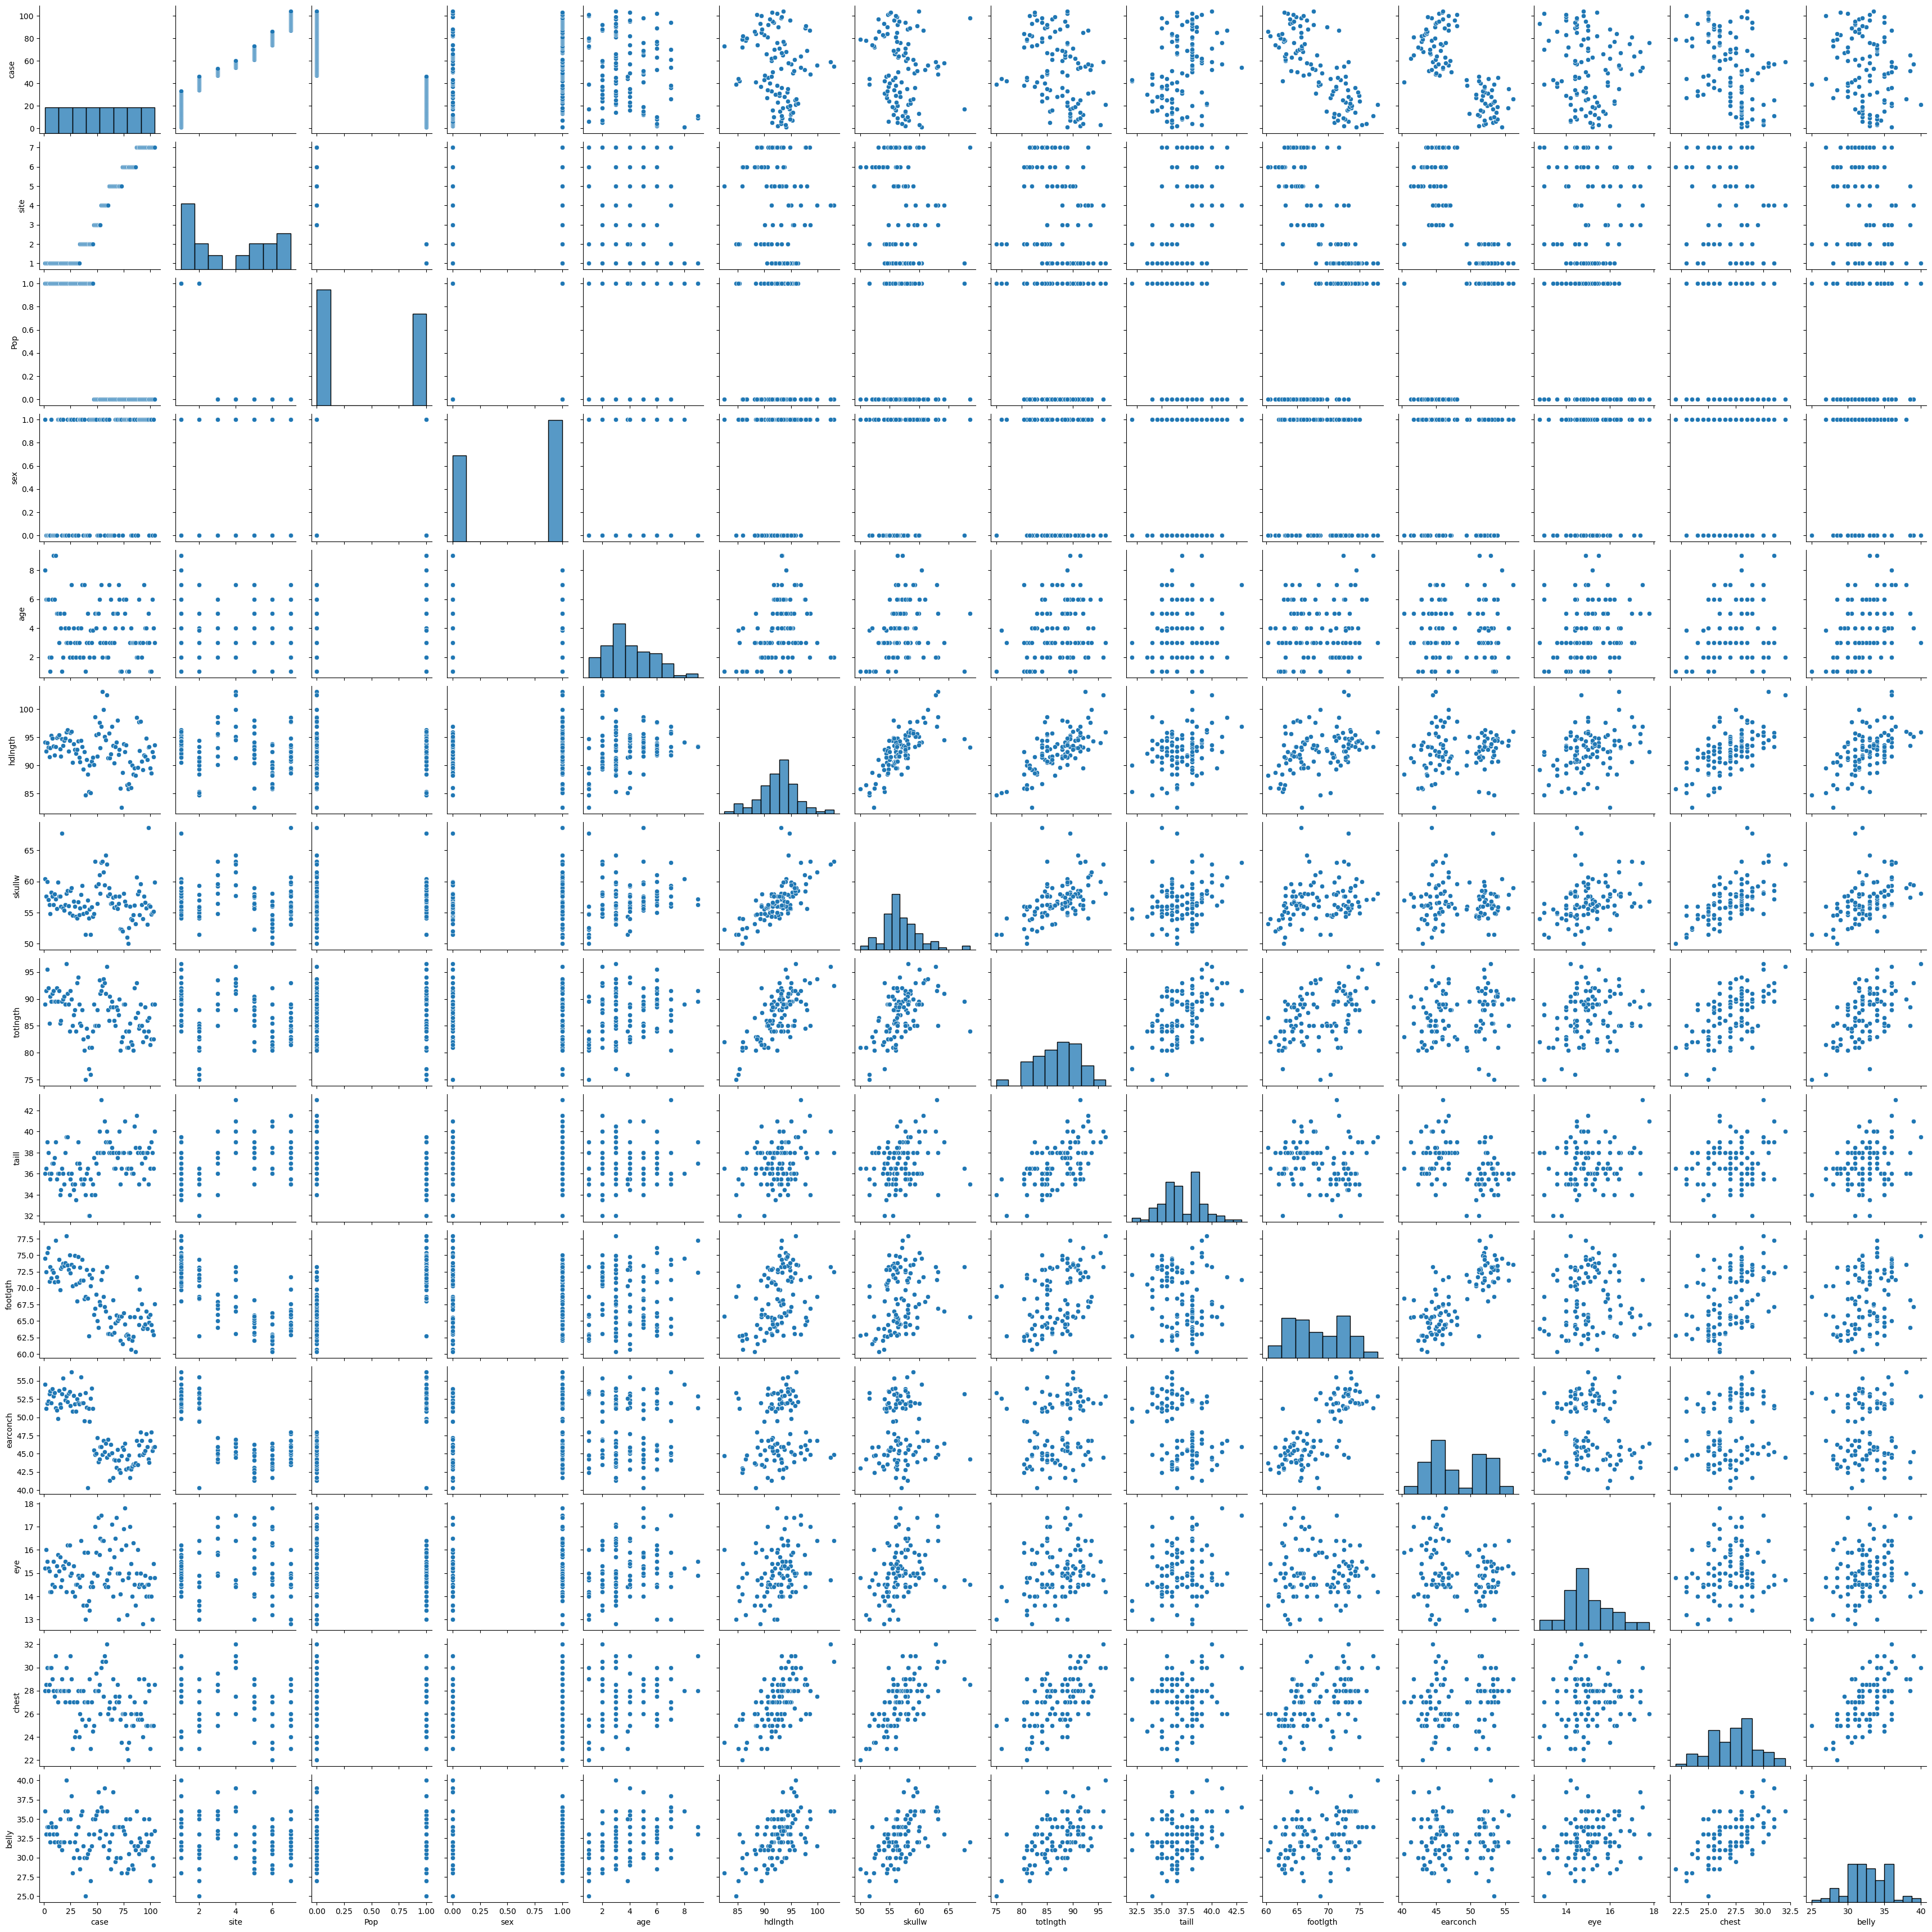

In [174]:
plt.figure(figsize=(20,6))
sns.pairplot(df)

<Axes: xlabel='hdlngth', ylabel='Density'>

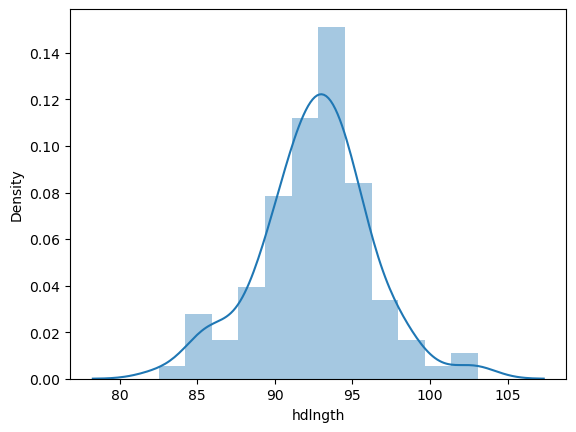

In [55]:
sns.distplot(df['hdlngth'])

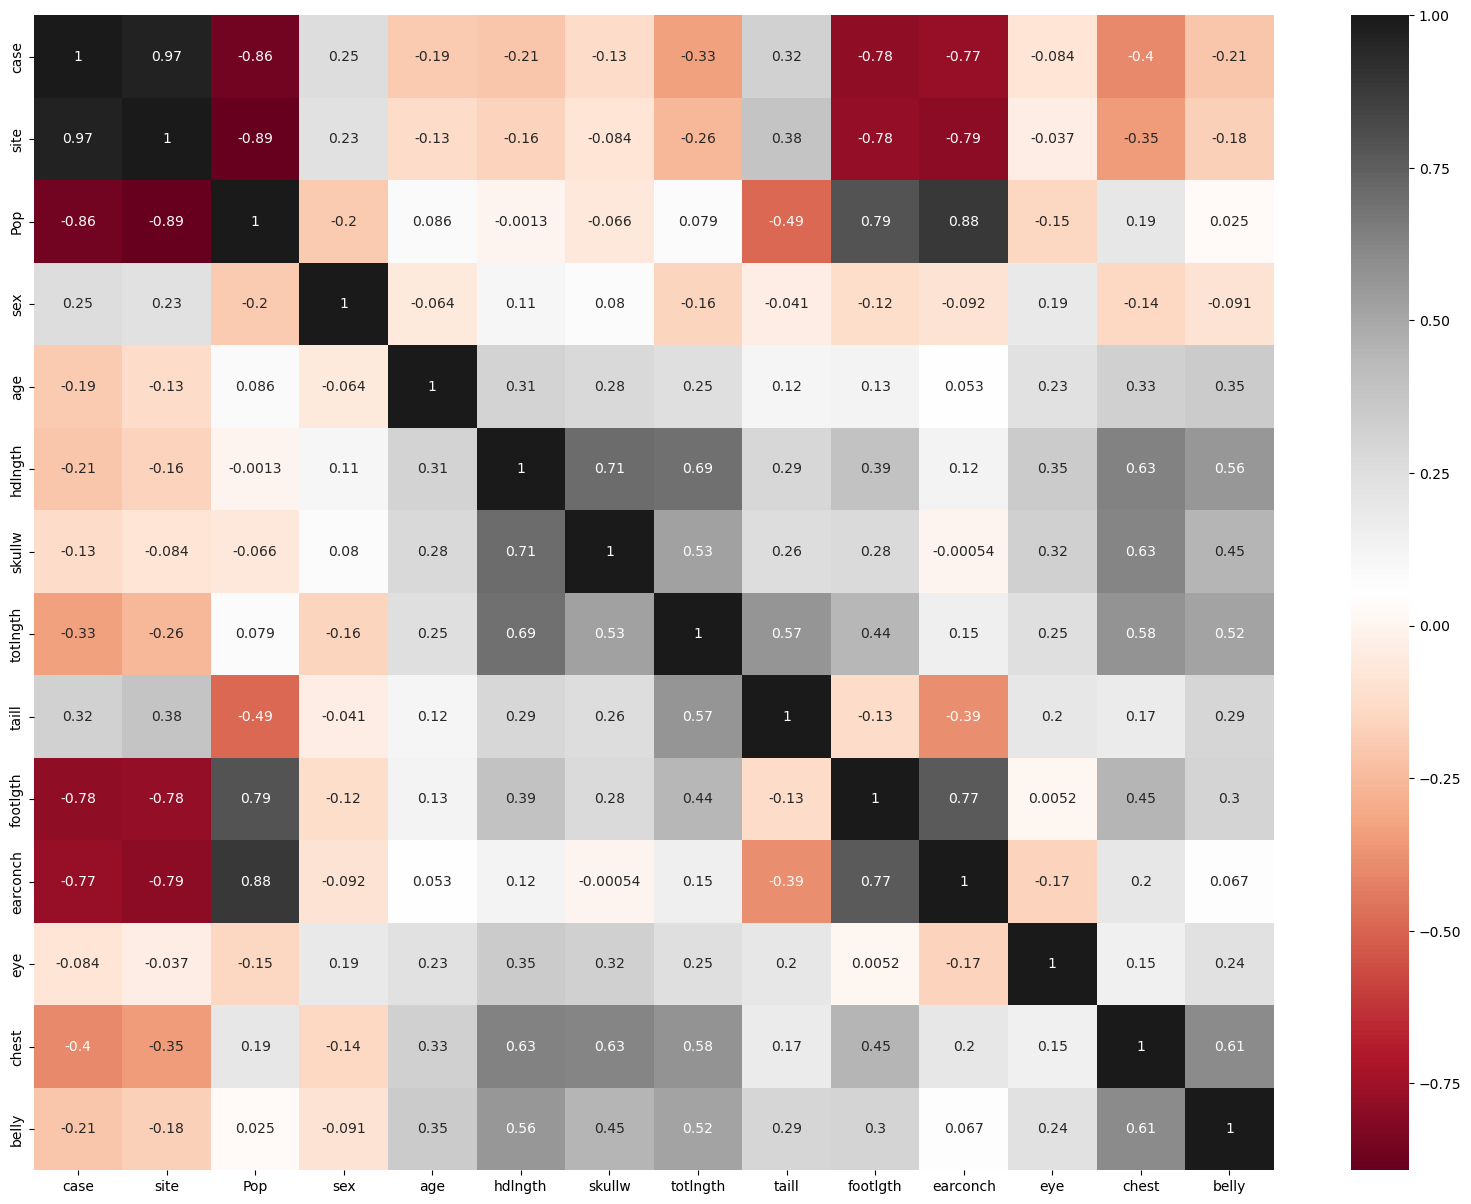

In [513]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap = 'RdGy',annot = True,cbar=True);

По тепловой карте и ранее по графикам, мы видими, что длинна головы имеет неплохие зависимости от размера черепа, груди, живота и длинны тела. Помимо этого есть зависимости между размером уха и ноги от популяции.

Но в ходе различных переборов данных для обучения, мы пришли к выводу, что целевой перменной у нас будет site(место), ибо несмотря на низкие зависимости между перменными, модели показывают более точные результаты, в противном случае идёт дикое перобучение 

<Axes: xlabel='age', ylabel='site'>

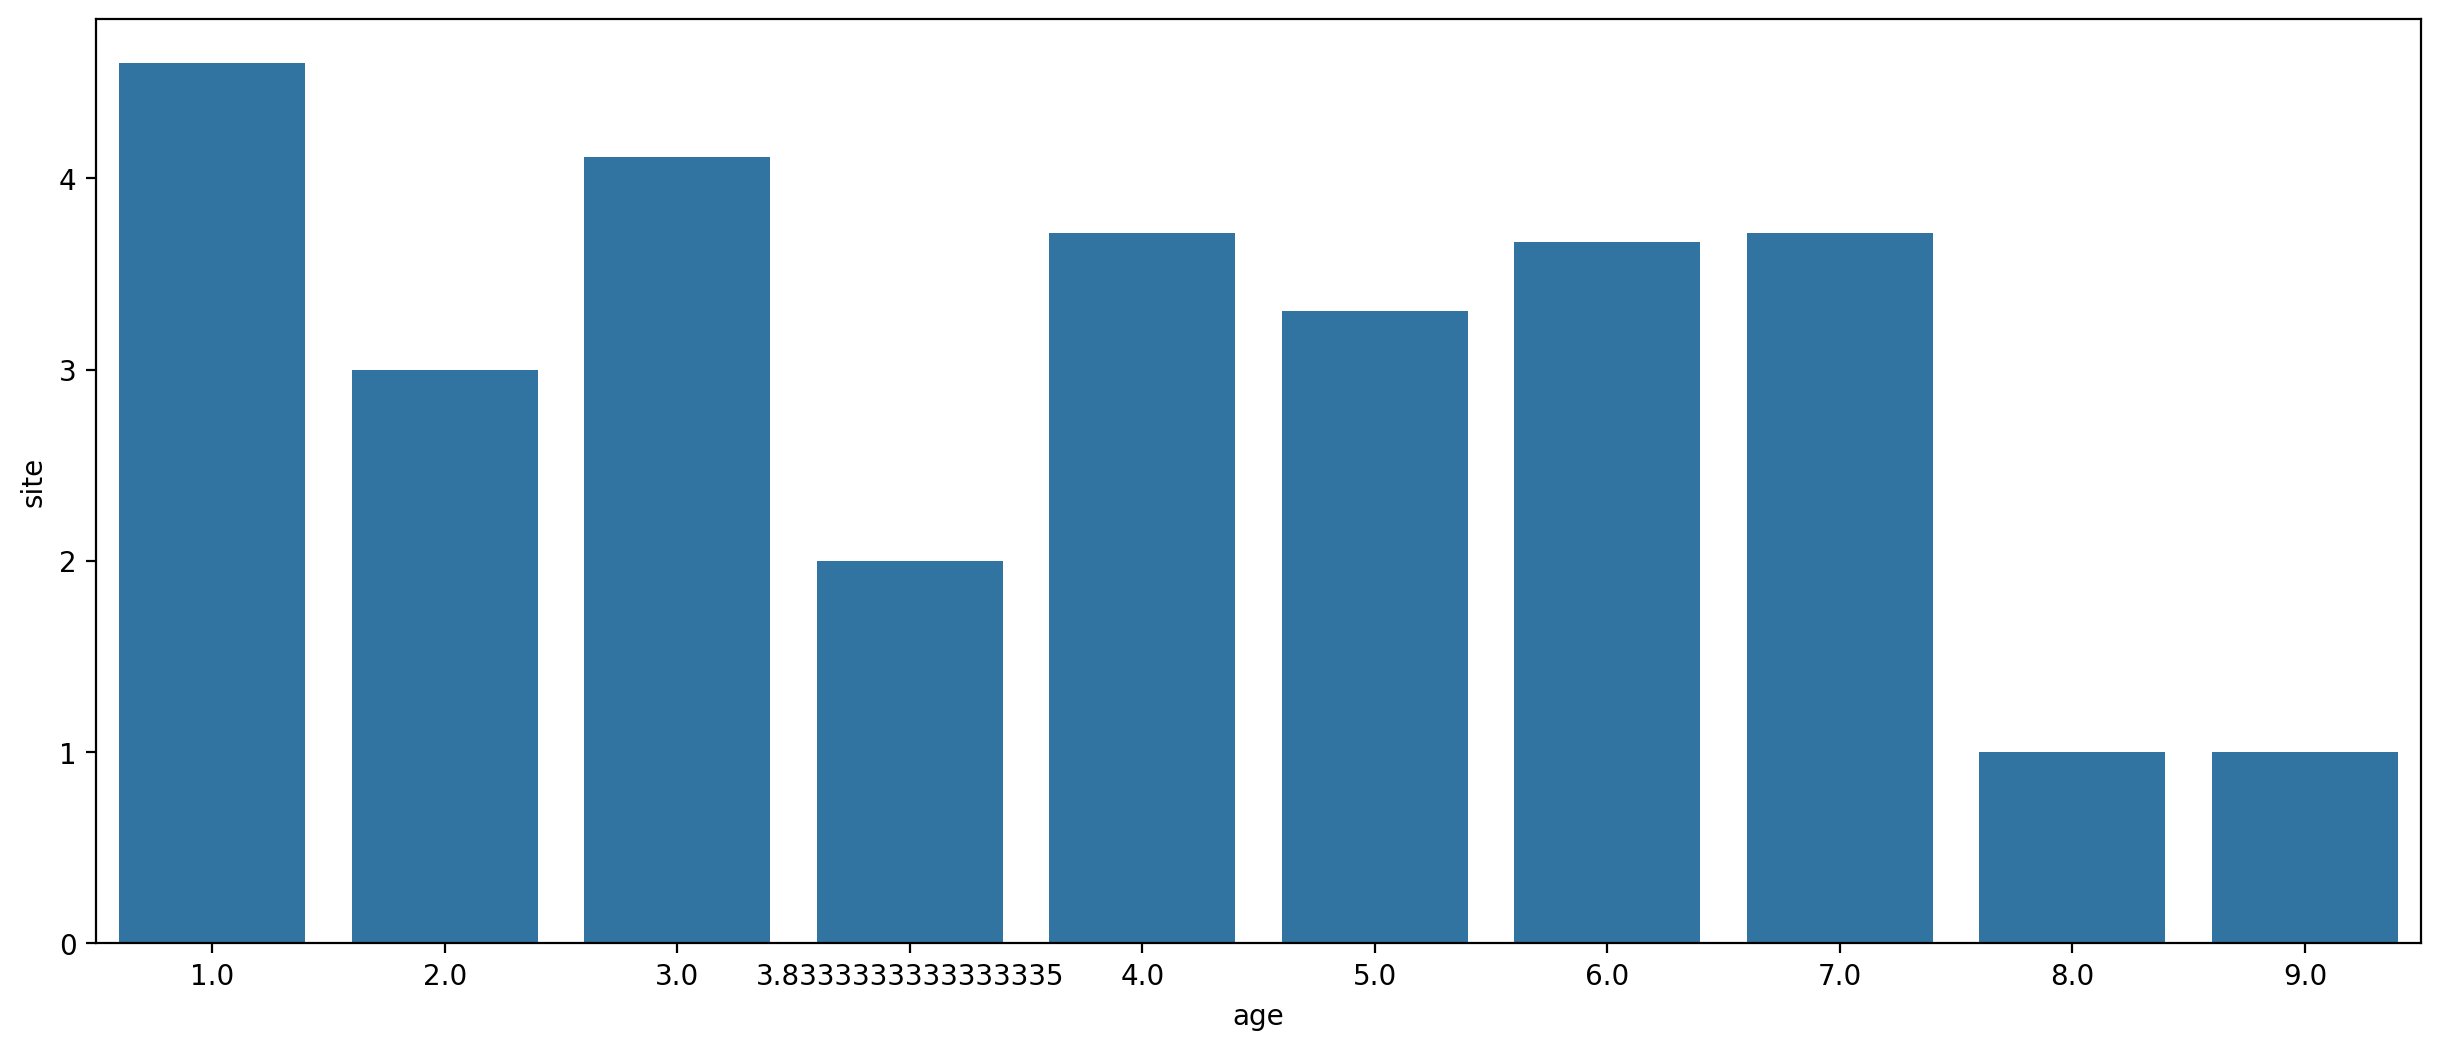

In [492]:
plt.figure(figsize = (15, 6), dpi = 200)
sns.barplot(x = 'age', y = 'site', data = df, ci = None)

### Обучение модели линейной регрессии

In [28]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [348]:
X = df[['hdlngth', 'totlngth', 'footlgth', 'age']]

In [350]:
y = df['site']

In [352]:
from sklearn.model_selection import train_test_split

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [357]:
from sklearn.linear_model import LinearRegression

In [419]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [421]:
lrm.intercept_

21.706883324431026

In [423]:
lrm.coef_

array([ 0.09550605,  0.05791311, -0.45776412, -0.17431588])

In [425]:
predictions = lrm.predict(X_test)

In [427]:
predictions

array([ 4.30485604,  5.86751756,  3.67091671,  2.40167606,  1.30739859,
        4.73037216,  3.99841001,  4.55039508, -1.10741204,  0.35031527,
        1.49232493,  1.21891631,  5.4055775 ,  4.42906739,  5.64566301,
        2.54737339,  4.75902832,  1.50011329,  2.59989996,  2.74334567,
        5.44101907,  4.70305332,  1.67296813,  5.71746872,  1.80716163,
        4.08558877,  1.32172054,  1.68574121,  2.74665062,  2.15619051,
        7.01387674,  2.40514663])

In [429]:
y_test.round(3)

30    1
65    5
64    5
53    4
45    2
93    7
91    7
47    3
10    1
0     1
18    1
31    1
88    7
95    7
77    6
4     1
80    6
33    2
12    1
26    1
98    7
55    4
22    1
76    6
44    2
72    5
15    1
42    2
40    2
9     1
85    6
11    1
Name: site, dtype: int64

<Axes: xlabel='site', ylabel='Density'>

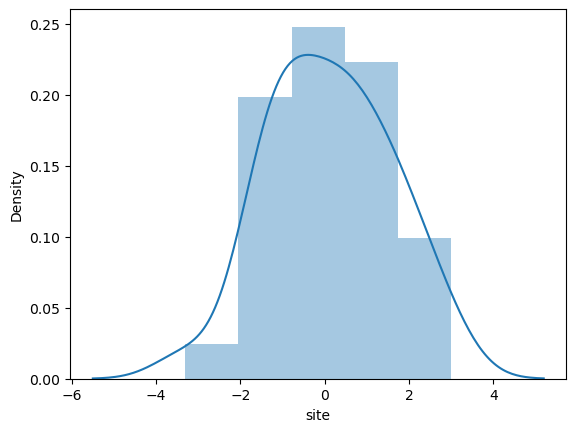

In [433]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии

In [436]:
from sklearn import metrics

In [438]:
metrics.mean_absolute_error(y_test, predictions)

1.2036290547136574

In [440]:
metrics.mean_squared_error(y_test, predictions)

2.0838690037207517

In [442]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.4435612227130348

In [444]:
metrics.r2_score(y_test, predictions)

0.6279194664672973

### Модель KNeighborsRegressor

In [447]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [449]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [451]:
from sklearn.metrics import r2_score

pred_train1 = knn.predict(X_train)
pred_test1 = knn.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train1):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test1):.2f}')

Train R2 0.70
Test R2 0.69


### Модель DecisionTreeRegressor

In [454]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth=4, min_samples_split=5, min_samples_leaf=3, random_state=1)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                      random_state=1)

In [456]:
pred_train2 = tree_1.predict(X_train)
pred_test2 = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train2):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test2):.2f}')

Train R2 0.81
Test R2 0.75


Для лучшего анализа результатов, проведём нормализацию данных

### Нормализация данных

In [459]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [461]:
mms.transform(X_train)

array([[0.48369565, 0.65116279, 0.40116279, 0.25      ],
       [0.05978261, 0.27906977, 0.12209302, 0.        ],
       [0.44021739, 0.60465116, 0.8255814 , 0.25      ],
       [0.10869565, 0.41860465, 0.09302326, 0.        ],
       [0.45652174, 0.72093023, 0.72674419, 0.        ],
       [0.39673913, 0.62790698, 0.19767442, 0.625     ],
       [0.56521739, 0.8372093 , 0.37790698, 0.375     ],
       [0.3423913 , 0.44186047, 0.70348837, 0.25      ],
       [0.4673913 , 0.60465116, 0.79069767, 0.75      ],
       [0.54347826, 0.6744186 , 0.72674419, 0.        ],
       [0.4673913 , 0.46511628, 0.23255814, 0.375     ],
       [0.52717391, 0.46511628, 0.61046512, 0.375     ],
       [0.54891304, 0.74418605, 0.69767442, 0.625     ],
       [0.02173913, 0.04651163, 0.55813953, 0.35416667],
       [0.72282609, 0.60465116, 0.25      , 0.5       ],
       [0.39130435, 0.55813953, 0.27325581, 0.75      ],
       [0.49456522, 0.55813953, 0.72674419, 0.375     ],
       [0.54891304, 0.65116279,

In [463]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,hdlngth,totlngth,footlgth,age
0,0.483696,0.651163,0.401163,0.250
1,0.059783,0.279070,0.122093,0.000
2,0.440217,0.604651,0.825581,0.250
3,0.108696,0.418605,0.093023,0.000
4,0.456522,0.720930,0.726744,0.000
...,...,...,...,...
67,0.065217,0.255814,0.075581,0.000
68,0.445652,0.488372,0.523256,0.500
69,0.244565,0.325581,0.180233,0.250
70,0.701087,0.860465,0.418605,0.625


In [465]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,hdlngth,totlngth,footlgth,age
count,32.000000,32.000000,32.000000,32.000000
mean,0.418648,0.543169,0.485573,0.389974
std,0.188400,0.173745,0.241737,0.247537
min,-0.119565,0.279070,-0.023256,0.000000
25%,0.320652,0.418605,0.289244,0.250000
50%,0.404891,0.500000,0.511628,0.375000
75%,0.523098,0.674419,0.668605,0.500000
max,0.826087,0.883721,0.959302,1.000000


In [467]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [471]:
pred_train3 = knn.predict(X_train_norm)
pred_test3 = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train3):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test3):.2f}')

Train R2 0.66
Test R2 0.66


In [473]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                      random_state=1)

In [475]:
pred_train4 = tree_1.predict(X_train_norm)
pred_test4 = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train4):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test4):.2f}')

Train R2 0.81
Test R2 0.75


In [477]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [479]:
pred_train5 = lrm.predict(X_train_norm)
pred_test5 = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train5):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test5):.2f}')

Train R2 0.63
Test R2 0.63


In [504]:
print(f'KNeighborsRegressor Train R2 {r2_score(y_train, pred_train3):.2f}')
print(f'KNeighborsRegressor Test R2 {r2_score(y_test, pred_test3):.2f}')
print()
print(f'DecisionTreeRegressor Train R2 {r2_score(y_train, pred_train4):.2f}')
print(f'DecisionTreeRegressor Test R2 {r2_score(y_test, pred_test4):.2f}')
print()
print(f'LinearRegression Train R2 {r2_score(y_train, pred_train5):.2f}')
print(f'LinearRegression Test R2 {r2_score(y_test, pred_test5):.2f}')

KNeighborsRegressor Train R2 0.66
KNeighborsRegressor Test R2 0.66

DecisionTreeRegressor Train R2 0.81
DecisionTreeRegressor Test R2 0.75

LinearRegression Train R2 0.63
LinearRegression Test R2 0.63


### Вывод

Мы проделали анализ данных и измененили датасет для комфортного обучения моделей регрессии, по результатам мы видим, что самое высокое значение у DecisionTreeRegressor, учитывая, что в тренировочной части она показывает аж 0.81, есть подозрения, что модель может быть немного переобучена.

Поэтому лучшей модели по нашему мнению будет KNeighborsRegressor, ибо тестовая часть совпадает с тренировочной, что говорит о том, что модель явно не переобучена и даёт хоть и не очень высокий результат, зато стабильный.